## Word2Vec

### SkipGram & CBOW

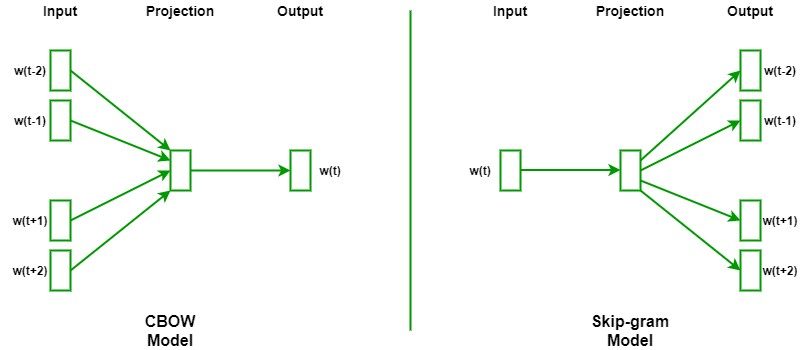

### Gensim

[Gensim](https://radimrehurek.com/gensim/index.html) – библиотека обработки естественного языка предназначения для «Тематического моделирования». С его помощью можно обрабатывать тексты, работать с векторными моделями слов (такими как Word2Vec, FastText и т. д.) и создавать тематические модели текстов

In [ ]:
import gensim.downloader as api
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

`word2vec-ruscorpora-300` - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Расшифровка POS-тегов](https://yandex.ru/dev/mystem/doc/grammemes-values.html/#grammemes-values__parts)

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

[Репозиторий gensim-data](https://github.com/RaRe-Technologies/gensim-data)

In [ ]:
wv = api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [ ]:
word_vector = wv['человек']
word_vector.shape

KeyError: ignored

In [ ]:
word_vector = wv['человек_NOUN']
word_vector.shape

(300,)

In [ ]:
wv.most_similar(positive=['человек_NOUN', 'компьютер_NOUN'], topn=5)

[('компьютерный_ADJ', 0.591947615146637),
 ('программист_NOUN', 0.5713083744049072),
 ('ноутбук_NOUN', 0.5553575158119202),
 ('пользователь_NOUN', 0.5512850880622864),
 ('интернет_NOUN', 0.5506680011749268)]

In [ ]:
wv.most_similar(positive=['королева_NOUN'], negative=['женщина_NOUN'], topn=5)

[('король_NOUN', 0.4940599203109741),
 ('королевский_ADJ', 0.4431174397468567),
 ('саксен::кобург_NOUN', 0.371537983417511),
 ('принц::уэльский_NOUN', 0.36908257007598877),
 ('королевство_NOUN', 0.3571174144744873)]

In [ ]:
print(wv.doesnt_match(['январь_NOUN', 'февраль_NOUN', 'март_NOUN', 'апрель_NOUN', 'собака_NOUN']))

собака_NOUN


### Обучение своих SkipGram эмбеддингов с Gensim

[Gensim Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)

Загрузим данные из Corus и пайплайн обработки из Spacy

In [ ]:
!wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

In [ ]:
!pip install corus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
!python3 -m spacy download ru_core_news_sm

In [ ]:
import gensim.models
from corus import load_lenta
import spacy
import string

In [ ]:
path = 'lenta-ru-news.csv.gz'
records = load_lenta(path)
data = [next(records).text for i in range(5000)]

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
%%time

res = []

for doc in nlp.pipe(data):
    res.append([token.lemma_ for token in doc if token.lemma_ not in string.punctuation and not token.is_stop])
res[0]

CPU times: user 8min 39s, sys: 2.37 s, total: 8min 42s
Wall time: 9min 6s


['вице',
 'премьер',
 'социальный',
 'вопрос',
 'татьяна',
 'голиков',
 'рассказать',
 'какой',
 'регион',
 'россия',
 'зафиксировать',
 'высокий',
 'смертность',
 'рак',
 'сообщать',
 'риа',
 'новость',
 'слово',
 'голиков',
 'онкологический',
 'заболевание',
 'становиться',
 'причина',
 'смерть',
 'псковский',
 'тверской',
 'тульский',
 'орловский',
 'область',
 'севастополь',
 'вице',
 'премьер',
 'напомнить',
 'главный',
 'фактор',
 'смертность',
 'россия',
 '—',
 'рак',
 'болезнь',
 'система',
 'кровообращение',
 'год',
 'известный',
 'смертность',
 'онкологический',
 'заболевание',
 'россиянин',
 'снизиться',
 'впервые',
 'три',
 'год',
 'данным',
 'росстата',
 '2017',
 'год',
 'рак',
 'умереть',
 '289',
 'тысяча',
 'человек',
 '3,5',
 'процент',
 'год']

In [ ]:
%%time

model = gensim.models.Word2Vec(
    sentences=res,
    vector_size=256, # default = 100
    window=7, # default = 5
    min_count=10,
    sg=1, # Training algorithm: 1 for skip-gram; otherwise CBOW
    hs=0, #  If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
    negative=5, # If > 0, negative sampling will be used, if set to 0, no negative sampling is used.
    epochs=25, # Number of iterations (epochs) over the corpus
    seed=2023,
)

CPU times: user 3min 50s, sys: 362 ms, total: 3min 50s
Wall time: 2min 15s


In [ ]:
model.wv.most_similar(positive=['апрель'], topn=5)

[('май', 0.40331730246543884),
 ('год', 0.3948393762111664),
 ('1997', 0.3566749393939972),
 ('fighter', 0.32819700241088867),
 ('март', 0.3153272271156311)]

In [ ]:
model.wv.most_similar(positive=['человек'], topn=5)

[('аметова', 0.43047022819519043),
 ('camp', 0.37536755204200745),
 ('самец', 0.36090657114982605),
 ('fire', 0.35134974122047424),
 ('молодой', 0.3502877950668335)]

In [ ]:
model.wv.most_similar(positive=['россия'], topn=5)

[('российский', 0.4784075915813446),
 ('госграница', 0.428486704826355),
 ('рф', 0.41281816363334656),
 ('страна', 0.40454670786857605),
 ('гройсман', 0.3970167934894562)]

#### Стандартный setup модели

- SkipGram + Negative Sampling
- Negative Samples - 2-5 если много данных, 5-20, если мало
- Размерность вектора 300
- Размер окна - 5-10 (большой размер окна - тематическое сходство, маленький - функциональное сходство)


## Проблемы Word2Vec и GloVe

- не учитывается морфология
- проблема с OOV (out of vocabulary) словами, но можно добавить `<unk>`

## FastText

- Слова разбиваются на n-grams

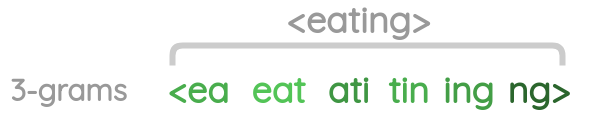

- Вектора для n-gramm обучаются с помощью Skip-gram / CBOW
- Вектор слова - усреднение векторов n-gram

[FastText](https://fasttext.cc/)

**hashing trick**:  n-gram очень много, поэтому зафиксируем максимум векторов, которые хотим обучать, сделаем хэш-таблицу, куда смаппим все n-gram'ы

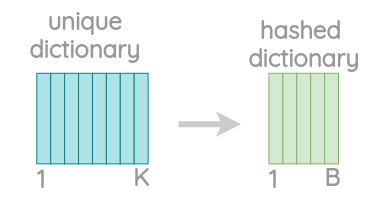

### Обучим свою FastText-модель

In [ ]:
!pip install fasttext

In [ ]:
with open('data.txt', 'w') as f:
  f.writelines(data)

In [ ]:
import fasttext

In [ ]:
%%time

model = fasttext.train_unsupervised('data.txt', wordNgrams=3, dim=300)

CPU times: user 7min 9s, sys: 2.16 s, total: 7min 11s
Wall time: 7min 24s


In [ ]:
model.words[100:110]

['около',
 'чем',
 'The',
 'После',
 'них',
 'российских',
 'является',
 'данным',
 'ноября,',
 'бы']

In [ ]:
model.get_word_vector("россия")[:15]

array([-0.38174158,  0.46940985, -0.10385878,  0.22877087,  0.0838922 ,
        0.39588752,  0.10838367,  0.04254621,  0.23738247,  0.13604161,
        0.32083935,  0.26735497,  0.08533647, -0.00485045,  0.3022698 ],
      dtype=float32)

In [ ]:
model.get_nearest_neighbors('россия')

[(0.8827095627784729, 'россиян.'),
 (0.8822407126426697, 'россиянок.'),
 (0.8799313306808472, 'россиянок'),
 (0.8675196766853333, 'россиян,'),
 (0.8671939969062805, 'россияне'),
 (0.8650916218757629, 'россиянки'),
 (0.8555282950401306, 'россиянам'),
 (0.8497037887573242, 'россиянке'),
 (0.8479588627815247, 'россиянку'),
 (0.8388267755508423, 'россиян')]

## Имеет ли смысл обучать свои эмбеддинги?

## Предобученные русскоязычные эмбеддинги

### RusVectores

[RusVectōrēs](https://rusvectores.org/ru/): семантические модели для русского языка

In [ ]:
import urllib.request
import gensim

In [ ]:
urllib.request.urlretrieve(
    "https://rusvectores.org/static/models/rusvectores4/ruwikiruscorpora/ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz",
    "ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz"
)

('ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz',
 <http.client.HTTPMessage at 0x7a01069f8130>)

In [ ]:
model_path = 'ruwikiruscorpora_upos_skipgram_300_2_2018.vec.gz'
model_ru = gensim.models.KeyedVectors.load_word2vec_format(model_path)

In [ ]:
model_ru.most_similar(positive=['ночь_NOUN'], topn=10)

[('ночь_PROPN', 0.7704508304595947),
 ('вечер_NOUN', 0.7683228254318237),
 ('утро_NOUN', 0.7520124316215515),
 ('полночь_NOUN', 0.7201331853866577),
 ('рассвет_NOUN', 0.6792924404144287),
 ('полдень_NOUN', 0.6637035012245178),
 ('утро_PROPN', 0.6531521677970886),
 ('ночь_ADV', 0.6248846650123596),
 ('сумерки_NOUN', 0.6227153539657593),
 ('ночью_NOUN', 0.6219336986541748)]

#### Проблемы

- На практике использовать такие эмбеддинги неудобно. Недостаточно разделить текст на токены, для каждого нужно как-то определить POS-тег.

- Таблица эмбеддингов разбухает. Вместо одного слова «стать», мы храним 6: 2 разумных «стать_VERB», «стать_NOUN» и 4 странных «стать_ADV», «стать_PROPN», «стать_NUM», «стать_ADJ».

- В таблице на 250 000 записей 195 000 уникальных слов.

### Navec

[navec](https://natasha.github.io/navec/) - компактные эмбеддинги для русского языка

GloVe эмбеддинги, в текстах мало опечаток, проблему OOV-токенов решает большой словарь. 250 000 строк в таблице news_1B_250K_300d_100q покрывают 98% слов в новостных статьях.

Архивы мало весят из-за квантизации: заменили 32-битные float-числа на 8-битные коды, затем заменили int-кодом не одно, а 3 числа. Кластеризуем все тройки чисел из таблицы эмбеддингов алгоритмом k-means на 256 кластеров, вместо каждой тройки будем хранить код от 0 до 255.

При использовании сжатые вектора распаковываются


[Navec evaluation](https://github.com/natasha/navec#evaluation)

In [ ]:
!pip install navec

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar

--2023-10-03 14:12:44--  https://storage.yandexcloud.net/natasha-navec/packs/navec_news_v1_1B_250K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26634240 (25M) [application/x-tar]
Saving to: ‘navec_news_v1_1B_250K_300d_100q.tar’

navec_news_v1_1B_25 100%[===================>]  25.40M  11.6MB/s    in 2.2s    

2023-10-03 14:12:47 (11.6 MB/s) - ‘navec_news_v1_1B_250K_300d_100q.tar’ saved [26634240/26634240]



In [ ]:
from navec import Navec

In [ ]:
path = 'navec_news_v1_1B_250K_300d_100q.tar'
navec = Navec.load(path)
navec['человек'][:15]

array([-0.13068067, -0.12051002, -0.05782367,  0.07967507,  0.08338855,
        0.59920526,  0.4020081 , -1.0838276 ,  0.12556174,  0.17060532,
        0.16637331, -0.00257014,  0.51296437,  0.17175263, -0.40394753],
      dtype=float32)

## Оценка близости векторов

- существует много разных способов измерить расстояние между векторами
- но в NLP мы чаще всего сталкиваемся с косинусным расстоянием

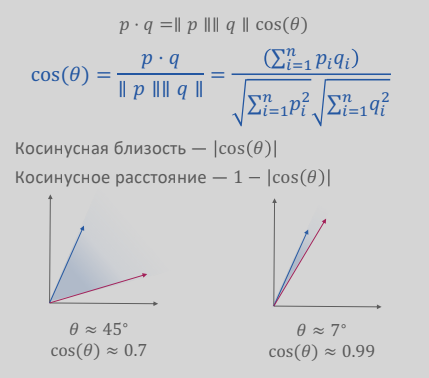

Длина вектора может зависеть от модели, которой этот вектор был построен. Тогда, например, Евклидово расстояние будет большим, но с косинусным все хорошо

## Визуализация

https://projector.tensorflow.org/

## Оценка эмбеддингов

### Intrinsic

#### SimLex-999

[SimLex-999](https://fh295.github.io/simlex.html)

Обеспечивает способ измерения того, насколько хорошо модели отражают сходство, а не родство или ассоциацию.

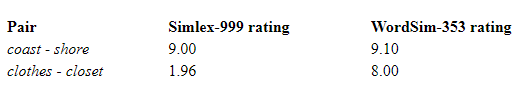

(coast\shore - берег, closet - шкаф, clothes - одежда)

#### wordsim353

[wordsim353](http://alfonseca.org/eng/research/wordsim353.html)

Оценивает сходство/связность слов

## Doc2Vec

[gensim Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)

In [ ]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

In [ ]:
#prepare dataset
def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield TaggedDocument(list_of_words, [i])

train_data = list(create_tagged_document(data))
print(train_data[:1])

[TaggedDocument(words='Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.', tags=[0])]


In [ ]:
%%time

model = Doc2Vec(vector_size=50, min_count=1, epochs=40)
model.build_vocab(train_data)
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 5min, sys: 4.82 s, total: 5min 5s
Wall time: 3min 51s


In [ ]:
print(model.infer_vector('gensim is really awesome'.split(' ')))

[-0.00880685 -0.00497583 -0.00296825  0.00616467 -0.00788493  0.00114681
 -0.00106133 -0.00490216  0.00197005 -0.00028668  0.0091407  -0.00181169
 -0.00682562  0.0084987  -0.00375795  0.00792437  0.00420504 -0.00397296
 -0.00113354 -0.00105714  0.00230009  0.0073712  -0.00778503 -0.00332474
 -0.00126832  0.00743415  0.00658491 -0.00419947 -0.00741446 -0.00604924
 -0.00924033  0.00462022  0.00094782 -0.0043252  -0.00460429  0.00842854
 -0.00049225 -0.00541507 -0.00403546  0.00154245 -0.00211218  0.00623046
 -0.00258292 -0.00103301 -0.00135756 -0.00301528 -0.0040803   0.00667015
 -0.00513779 -0.00868881]


## Что еще почитать

[Topic Modeling with LSA, PLSA, LDA & lda2Vec](https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05)

[Matrix decompositions and latent semantic indexing](https://nlp.stanford.edu/IR-book/pdf/18lsi.pdf)

_______


[Word2Vec: покажи мне свой контекст, и я скажу, кто ты](https://sysblok.ru/knowhow/word2vec-pokazhi-mne-svoj-kontekst-i-ja-skazhu-kto-ty/)

[Чудесный мир Word Embeddings: какие они бывают и зачем нужны?](https://habr.com/ru/company/ods/blog/329410/)

[Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)

[Distributed Representations of Words and Phrases and their Compositionality](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)

[word2vec Explained: Deriving Mikolov et al.’s Negative-Sampling Word-Embedding Method](https://arxiv.org/pdf/1402.3722v1.pdf)

[Word2Vec: классификация текстовых документов](https://habr.com/ru/post/277563/)

[Пирожки в дистрибутивной семантике](https://habr.com/ru/post/275913/)

[FastText: рецепт работы по коду](https://habr.com/ru/post/492432/)

[FastText: stepping through the code](https://medium.com/@mariamestre/fasttext-stepping-through-the-code-259996d6ebc4)


[Distributed Representations of Sentences and Documents](https://arxiv.org/pdf/1405.4053v2.pdf)

___

[Word2Vec Model Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)

[FastText Model Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html#sphx-glr-auto-examples-tutorials-run-fasttext-py)

[Comparison of FastText and Word2Vec](https://github.com/RaRe-Technologies/gensim/blob/ba1ce894a5192fc493a865c535202695bb3c0424/docs/notebooks/Word2Vec_FastText_Comparison.ipynb)
